In [26]:
import pygmt
import numpy as np
import xarray as xr

In [27]:
# Choose fonts: to learn more, search gmt.conf on pygmt webpage
pygmt.config(FONT='10p,Times-Roman,black')
pygmt.config(FONT_LABEL='10p,Times-Roman,black')
pygmt.config(FONT_TITLE='10p,Times-Roman,black')
pygmt.config(MAP_TITLE_OFFSET='6.0p')
pygmt.config(FORMAT_GEO_MAP="ddd")

In [28]:
# Set Regional Map dimensions
west, east, south, north = -143.0, -100.0, 32.0, 58.0
region_data = np.array([west, east, south, north])

In [29]:
dlon_edge = 0.35
dlat_edge = 1.0
region1 = f"{west}/{east}/{south}/{north}"
print('Region: ', region1)

Region:  -143.0/-100.0/32.0/58.0


In [30]:
# Get center position and two latitude locations to define regional projection
clon = np.floor(region_data[0:2].mean())
clat = np.floor(region_data[2:4].mean())
lat1 = np.floor(0.5*(north - clat) + clat)
lat2 = np.floor(clat - 0.5*(clat - south))

In [31]:
mapwidth = 4.5 # inches, sets size of figure on page
proj1 = f'B{clon}/{clat}/{lat1}/{lat2}/{mapwidth}i'

In [32]:
# Start figure
fig = pygmt.Figure()
fig.basemap(region=region1, projection=proj1, frame=["a5f2.5", f'WSne'])
print('Plotting topo grid')
topogrid = pygmt.datasets.load_earth_relief(region=region1,resolution="01m",registration="pixel")
pygmt.grd2cpt(grid=topogrid,cmap="gray")
shade = pygmt.grdgradient(grid=topogrid, azimuth=10)
fig.grdimage(grid=topogrid,shading=shade)
fig.colorbar(position="JML+o0.5c/1.5c+w5c/0.3c", box=False, frame=["a1000g500","x+lDepth/Height", "y+lmeters"])

Plotting topo grid


In [33]:
litho_nc_fp = "../../data/LITHO1.0.nc"
dataset = xr.open_dataset(litho_nc_fp)

In [34]:
# Access variables (as numpy)
lon1 = dataset['longitude'].values
lat1 = dataset['latitude'].values
lon, lat = np.meshgrid(lon1,lat1)

In [35]:
# Can change which layer to choose here
#lid = dataset['lower_crust_bottom_depth'].to_numpy()
lid = dataset['lid_bottom_depth'].to_numpy()
nx,ny = lid.shape
# reshape to 1-D arrays
lid = lid.reshape(nx*ny,)
lon = lon.reshape(nx*ny,)
lat = lat.reshape(nx*ny,)

In [36]:
lithomean = pygmt.blockmean(x=lon,y=lat,z=lid,region=region1, spacing=1.0)
lithogrid = pygmt.surface(lithomean, region=region1, spacing=1.0,tension="0.8")
fig.grdcontour(grid=lithogrid,levels=10, annotation=50, pen='1p,darkbrown')

In [37]:
fig.coast(region=region1,
          frame=["a", "+tCascadia"],
          shorelines=True,
          borders=[1,2,3],
          projection=proj1)

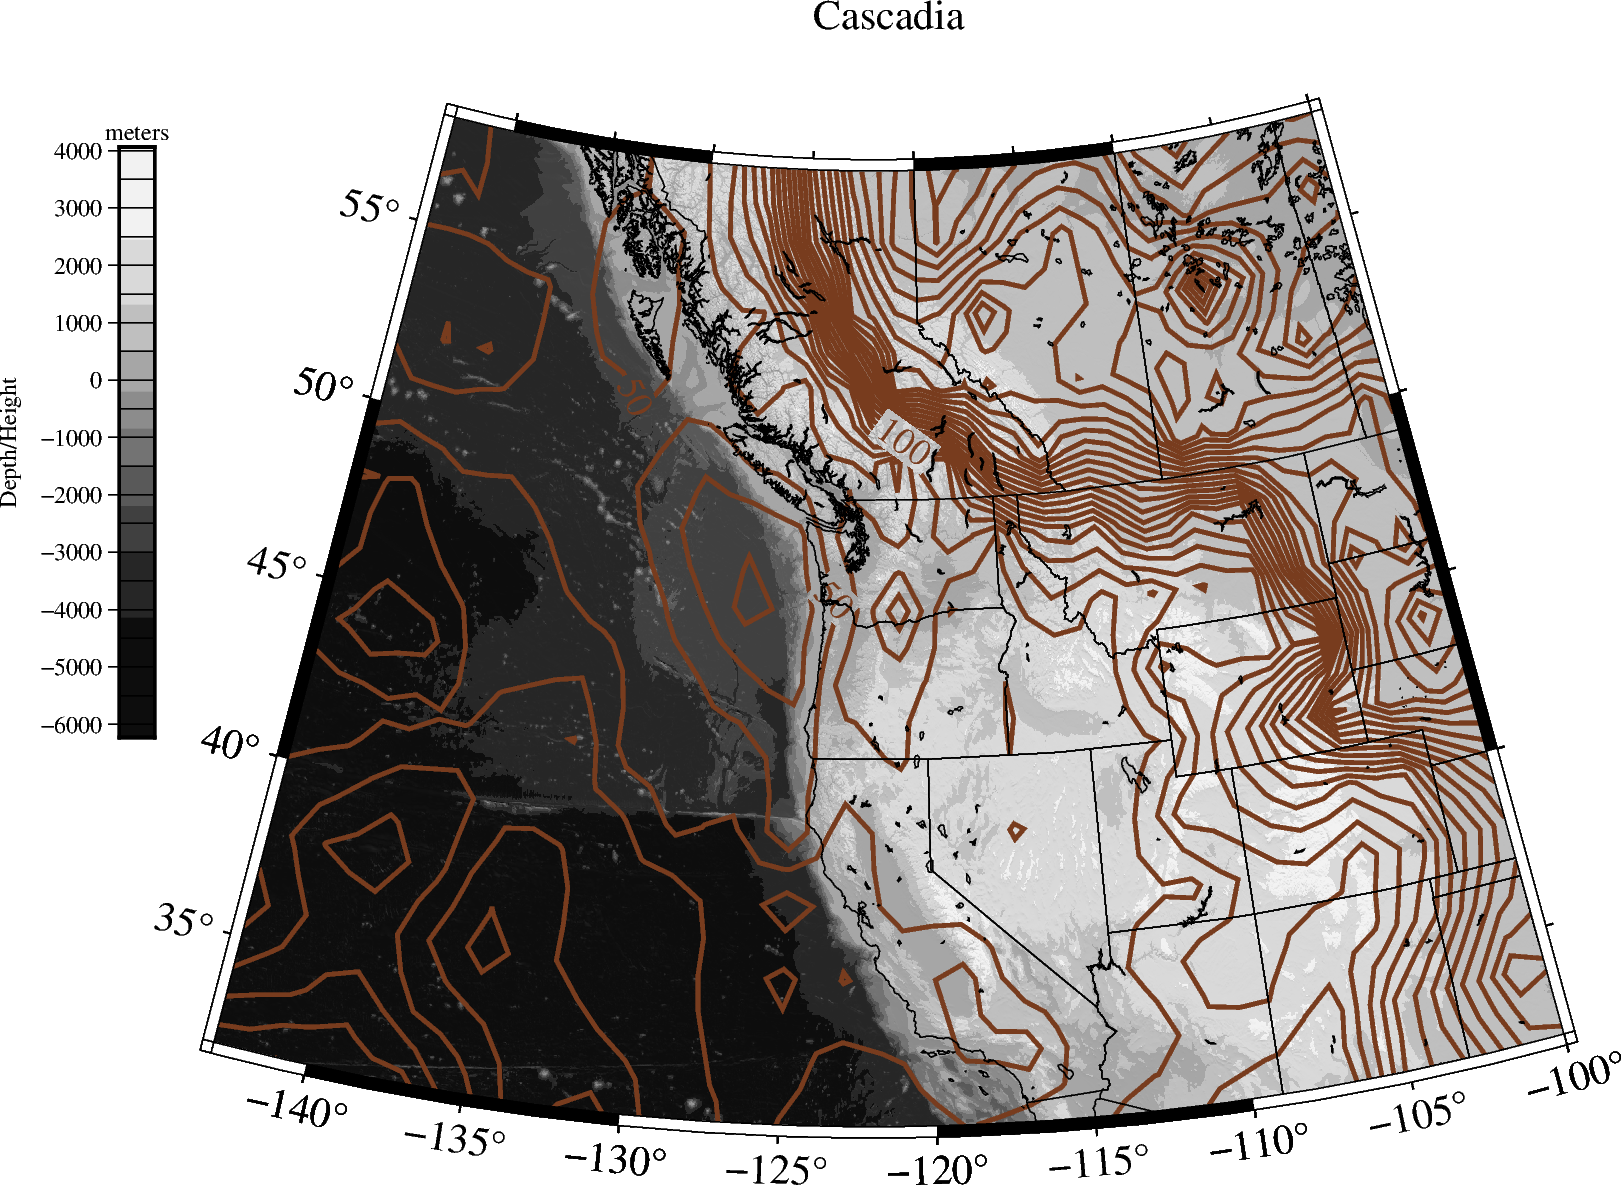

In [38]:
fig.show()